In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("TRY1.csv")

In [3]:
df.shape

(401958, 280)

In [4]:
df1 = pd.DataFrame()
df1[["age","llsex","cpsex","race","tolddiabetes","diabetesage","hbptest","Doctold","TakeInsulin","chkbloodsug","feetchk","healthprof","chkhemo","eyeexam","diabeye"]] = df[["x.ageg5yr","sexvar","cellsex","x.mrace1","diabete4","diabage3","pdiabtst","prediab1","insulin1","bldsugar","feetchk3","doctdiab","chkhemo3","eyeexam1","diabeye"]]
df2 = df1.dropna(subset=["cpsex","tolddiabetes"])

In [5]:
df_told = pd.DataFrame(df2[~df2['tolddiabetes'].isnull()]['tolddiabetes'])

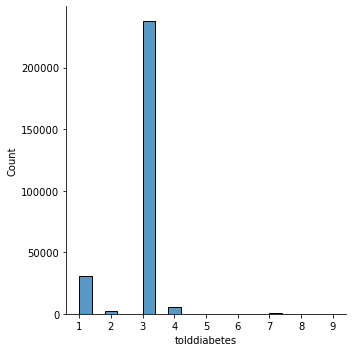

In [6]:
#distribution plot of 'told diabetes'
#1: Yes 2: Yes, but female told only during pregnancy, 3: No, 4: no, pre-diabetes or borderline diabetes 7: don't know
sns.displot(df_told, x="tolddiabetes")

In [7]:
# countplot of tolddiabetes vs sex
df_rel1 = df2[~df2['tolddiabetes'].isnull()][['tolddiabetes', 'llsex']]

<AxesSubplot:xlabel='tolddiabetes', ylabel='count'>

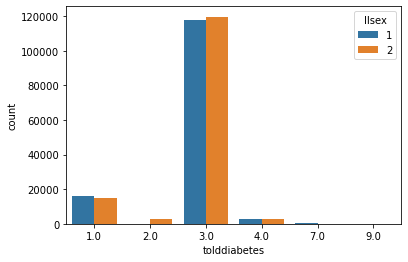

In [8]:
sns.countplot(x = 'tolddiabetes', hue = 'llsex', data = df_rel1)

In [9]:
#countplot of tolddiabetes vs race
#distribution among race
#we have more data from white? bias? solution: plot them separately for clear visualization 

In [10]:
df_rel2 = df2[(~df2['tolddiabetes'].isnull()) & (df2['race'] !=77) & (df2['race'] !=99)][['tolddiabetes', 'race']]
white = df_rel2[df_rel2['race'] == 1]

<AxesSubplot:xlabel='race', ylabel='count'>

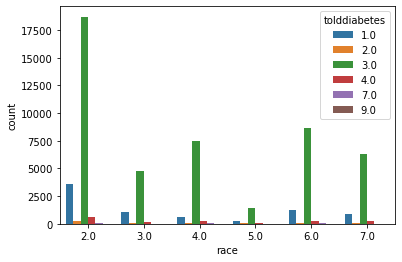

In [11]:
sns.countplot(x = 'race', hue = 'tolddiabetes', data = df_rel2[df_rel2['race']!= 1])

<AxesSubplot:xlabel='race', ylabel='count'>

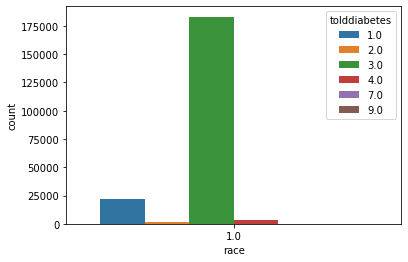

In [12]:
sns.countplot(x = 'race', hue = 'tolddiabetes', data = df_rel2[df_rel2['race']== 1])

In [13]:
#told diabetes "'Yes" vs "Race"
#white people are told to have diabetes more often, but this could be due to we have more data points for white
#told_yes = df_rel2[df_rel2['tolddiabetes'] == 1]
#told_no = df_rel2[df_rel2['tolddiabetes'] == 3]
#Observation: race 3 more likely to be told diabetes
df_rel3 = df_rel2.groupby(df_rel2['race']).mean()
df_rel3.reset_index(inplace = True)

<AxesSubplot:xlabel='race', ylabel='tolddiabetes'>

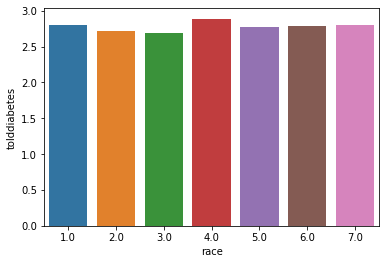

In [14]:
sns.barplot(data = df_rel3, x = 'race', y='tolddiabetes')